### Tensorflow - Linear Regression

### Import Libraries

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
# makes the graphs nicer 
%config InlineBackend.figure_format = 'svg'

In [3]:
learning_rate = 0.01
epochs = 200

In [11]:
n_samples = 30
train_x = np.linspace(0,20,n_samples)
train_y = 3 * train_x + 4 * np.random.randn(n_samples)

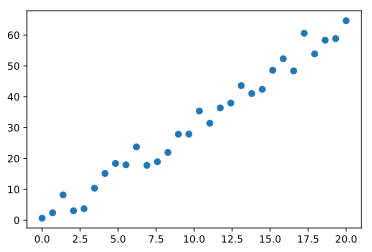

In [13]:
plt.plot(train_x,train_y,'o')
plt.show()

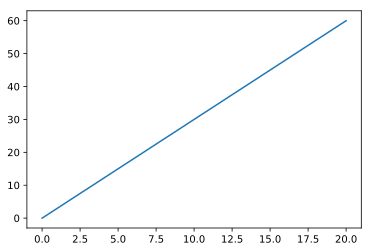

In [16]:
plt.plot(train_x,3*train_x) # Simple line
plt.show()

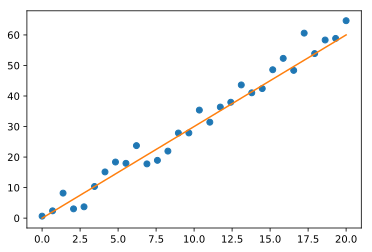

In [17]:
plt.plot(train_x,train_y,'o')
plt.plot(train_x,3*train_x) # add simple line
plt.show()

### Step 1

### Define X data Y data and training values - weight and bias - X, Y, W, B

In [20]:
# We need to define everything upfront
X = tf.placeholder('float') # tf.placeholder(tf.float32) # or 
Y = tf.placeholder('float') #tf.placeholder()

# training weignts and bias
# initialize the variable - using random number
W = tf.Variable(np.random.randn(),name = 'weights')
B = tf.Variable(np.random.randn(),name = 'bias')

### Step 2

### Define the Graph

In [22]:
# pred = X * W + B # <-----Graph
# tf.add((tf.multply(X,W)),B) is same as X * W + B - We are just using the tensorflow builtin function

pred = tf.add(tf.multiply(X,W),B) 

### Step 3 

### Define Cost function

In [23]:
# Cost function
cost = tf.reduce_sum((pred-Y)**2) / (2*n_samples)

### Step 4

### Define the Optimizer

In [25]:
# We are going to use Gradient Descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

### Step 5

### Train

In [26]:
# Initialize all our variables
init = tf.global_variables_initializer()


epoch:0000 c=61.2836 w=2.1623 b=0.5435
epoch:0020 c=4.4666 w=3.0976 b=0.5659
epoch:0040 c=4.4511 w=3.1011 b=0.5122
epoch:0060 c=4.4372 w=3.1044 b=0.4613
epoch:0080 c=4.4247 w=3.1075 b=0.4129
epoch:0100 c=4.4133 w=3.1104 b=0.3670
epoch:0120 c=4.4031 w=3.1133 b=0.3234
epoch:0140 c=4.3939 w=3.1159 b=0.2821
epoch:0160 c=4.3856 w=3.1184 b=0.2429
epoch:0180 c=4.3781 w=3.1208 b=0.2056


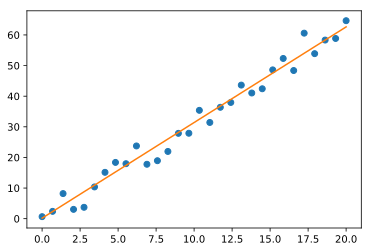

In [33]:
# All computations will be done in a tensorflow session
with tf.Session() as sess:
    sess.run(init) # first initialize the values
    
    for epoch in range(epochs): #we are going to loop over no of epoch we define & run optimizer

        for x,y in zip(train_x,train_y):#loop over x & y data
            sess.run(optimizer,feed_dict = {X:x,Y:y}) #run optimizer and feed x & y data for converge good weights and bias values
            
        if not epoch % 20 :
            c = sess.run(cost , feed_dict = {X:train_x,Y:train_y})
            w = sess.run(W)
            b = sess.run(B)
            print(f'epoch:{epoch:04d} c={c:.4f} w={w:.4f} b={b:.4f}')
            
    weight = sess.run(W)
    bias = sess.run(B)
    
    plt.plot(train_x,train_y,'o')
    plt.plot(train_x,weight * train_x + bias)
    plt.show()